# Repression rate in order to obtain optimal performance

In [1]:
# -*- coding: utf-8 -*-
from __future__ import division, print_function, absolute_import

import numpy as np
import networkx as nx
import pandas as pd
import random

from reservoir_tools.utils import get_spectral_radius, nrmse, bisection, get_args_index, is_number
from reservoir_tools.control_graphs import control_graphs, randomize_network
from reservoir_tools.datasets import narma10, narma30
from reservoir_tools.tasks import memory_capacity, critical_memory_capacity
from reservoir_tools.readouts import LinearRegression, RidgeRegression
from reservoir_tools.reservoirs import simulate_reservoir_dynamics, remove_node
from reservoir_tools import grn_networks
from reservoir_tools import network_tools as nt
from reservoir_tools.network_statistics import average_degree, connectivity_fraction
from reservoir_tools.load_preserving_sign import load_preserving_signs

## NARMA 10 task

In [3]:
ps_inh, res_mean, res_std = np.loadtxt("data/70_nodes_all_percentages_NARMA.txt", delimiter=' ', usecols=(0, 1, 2), unpack=True)

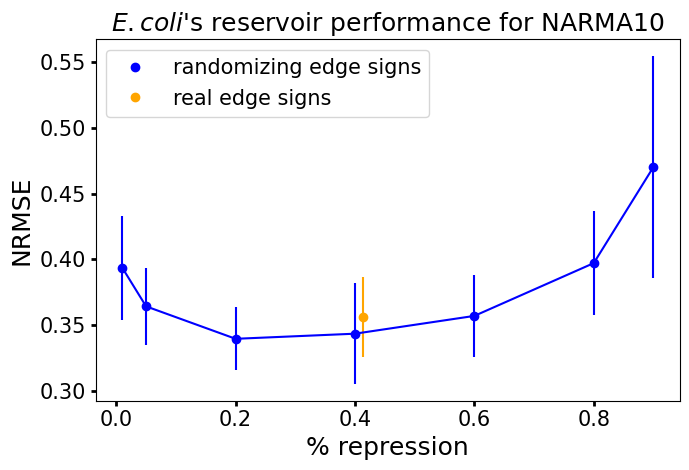

In [4]:
import matplotlib.pyplot as plt 
fig, ax1 = plt.subplots(figsize=(7.0, 4.8))


ax1.plot(ps_inh , res_mean, "o",  color="blue", label="randomizing edge signs")
ax1.errorbar(ps_inh, res_mean, yerr=np.array(res_std), color="blue")
ax1.errorbar([0.41324921135646686], [0.3560299217875965], yerr=np.array([0.030310864164579805]),  color="orange")
ax1.plot([0.41324921135646686], [0.3560299217875965], "o",  color="orange", label="real edge signs")
ax1.set_xlabel('% repression', fontsize=18)
ax1.set_ylabel('NRMSE',  fontsize=18)
ax1.set_title(r"$\mathit{E. coli}$'s reservoir performance for NARMA10", fontsize=18)
ax1.legend(loc='upper left', fontsize=15)
ax1.tick_params(width=2, axis='both', which='major', labelsize=15)

plt.tight_layout()
#plt.savefig('NARMA_INH.pdf',bbox_inches='tight')
plt.show()

## Memory capacity

In [5]:
ps_inh, res_mean, res_std = np.loadtxt("data/70_nodes_all_percentages_mem_cap.txt", delimiter=' ', usecols=(0, 1, 2), unpack=True)

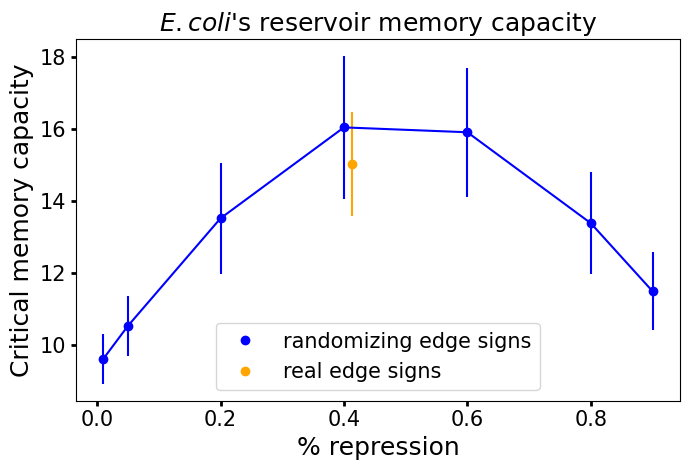

In [6]:
import matplotlib.pyplot as plt 
fig, ax1 = plt.subplots(figsize=(7.0, 4.8))


ax1.plot(ps_inh , res_mean, "o",  color="blue", label="randomizing edge signs")
ax1.errorbar(ps_inh, res_mean, yerr=np.array(res_std), color="blue")
ax1.errorbar([0.41324921135646686], [15.03], yerr=np.array([1.4384366513684224]),  color="orange")
ax1.plot([0.41324921135646686], [15.03], "o",  color="orange", label="real edge signs")
ax1.set_xlabel('% repression', fontsize=18)
ax1.set_ylabel('Critical memory capacity',  fontsize=18)
ax1.set_title(r"$\mathit{E. coli}$'s reservoir memory capacity", fontsize=18)
ax1.legend(loc='lower center', fontsize=15)
ax1.tick_params(width=2, axis='both', which='major', labelsize=15)

plt.tight_layout()
#plt.savefig('mem_cap_INH.pdf',bbox_inches='tight')
plt.show()